<h1>24MAI0111 ANMOL CHAUBEY</h1>

<h3>For performing this task I have taken the SuperMarket Sales Dataset.This dataset contains the transactions recoreds from a supermarket chain in Myanamar across three cities:Yangon, Naypyitaw, and Mandalay.</h3> 

<h3>DATA PREPROCESSING</h3>

1.) Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.) Load the dataset

In [3]:
df = pd.read_csv("SuperMarket Analysis.csv")

3.) Printing the few entries of the dataset

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


4.) Filling the missing values in the dataset

In [5]:
df.fillna({
    "Branch": "Unknown",
    "City": "Unknown",
    "Customer type": "Unknown",
    "Gender": "Unknown",
    "Product line": "Unknown",
    "Unit price": df['Unit price'].median(),
    "Quantity": df['Quantity'].median(),
    "Tax 5%": 0,
    "Sales": 0,
    "gross income": 0,
    "Rating": df['Rating'].mean()
}, inplace=True)

5.) Converting the format of the Date to datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)

6.) Handling the outliers

In [7]:
Q1 = df[['Unit price', 'Quantity']].quantile(0.25)
Q3 = df[['Unit price', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Unit price', 'Quantity']] < (Q1 - 1.5 * IQR)) | (df[['Unit price', 'Quantity']] > (Q3 + 1.5 * IQR))).any(axis=1)]

<h3>DATA AGGREGATION</h3>

7.) Aggregates sales data by date to get total daily sales and quantity sold

In [8]:
daily_sales = df.groupby('Date').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()
print("Daily Sales:\n", daily_sales.head())

Daily Sales:
         Date      Sales  Quantity
0 2019-01-01  4745.1810        81
1 2019-01-02  1945.5030        48
2 2019-01-03  2078.1285        37
3 2019-01-04  1623.6885        32
4 2019-01-05  3536.6835        55


8.) Aggregates sales and quantity data by store branch to analyze store-level performance.

In [9]:
store_sales = df.groupby('Branch').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()
print("\nStore Sales:\n", store_sales)


Store Sales:
   Branch        Sales  Quantity
0   Alex  106200.3705      1859
1  Cairo  106197.6720      1820
2   Giza  110568.7065      1831


9.) Groups data by product line to get total sales and quantity sold for each product category

In [10]:
product_sales = df.groupby('Product line').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()
print("\nProduct Sales:\n", product_sales)


Product Sales:
              Product line       Sales  Quantity
0  Electronic accessories  54337.5315       971
1     Fashion accessories  54305.8950       902
2      Food and beverages  56144.8440       952
3       Health and beauty  49193.7390       854
4      Home and lifestyle  53861.9130       911
5       Sports and travel  55122.8265       920


<h3>DATA ANALYSIS</h3>

10.) Calculating the average sales amount per unit for each product.

In [11]:
product_sales['Average Sales Amount'] = product_sales['Sales'] / product_sales['Quantity']
print("\nAverage Sales Amount per Product Line:\n", product_sales[['Product line', 'Average Sales Amount']])


Average Sales Amount per Product Line:
              Product line  Average Sales Amount
0  Electronic accessories             55.960383
1     Fashion accessories             60.206092
2      Food and beverages             58.975676
3       Health and beauty             57.603910
4      Home and lifestyle             59.123944
5       Sports and travel             59.916116


11.) Identifying the branch with the highest total sales

In [12]:
top_store = store_sales.loc[store_sales['Sales'].idxmax()]
print("\nStore with Highest Sales:\n", top_store)


Store with Highest Sales:
 Branch             Giza
Sales       110568.7065
Quantity           1831
Name: 2, dtype: object


12.) Calculating the correlation between customer rating and sales.

In [13]:
rating_sales_correlation = df[['Rating', 'Sales']].corr().iloc[0, 1]
print("\nCorrelation between Rating and Sales:\n", rating_sales_correlation)


Correlation between Rating and Sales:
 -0.03644170499701847


<h3>VISUALIZATION</h3>

13.) Daily sales trends over time.

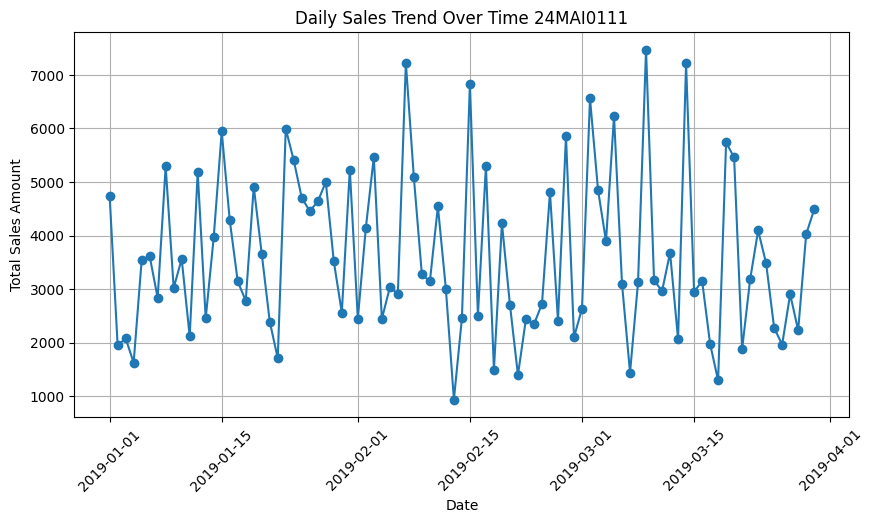

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Sales'], marker='o')
plt.title("Daily Sales Trend Over Time 24MAI0111")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

14.) Bar Plot to show sales distribution across different store branches.

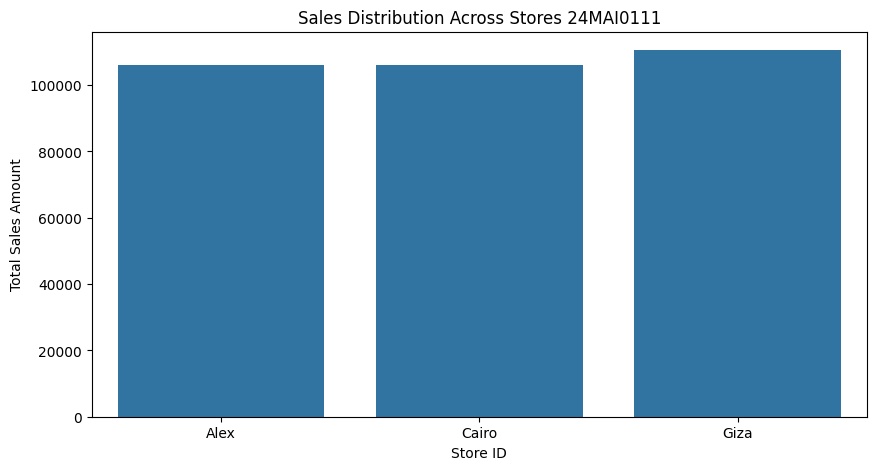

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(data=store_sales, x='Branch', y='Sales')
plt.title("Sales Distribution Across Stores 24MAI0111")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.show()

15.) Average sales amount per product.

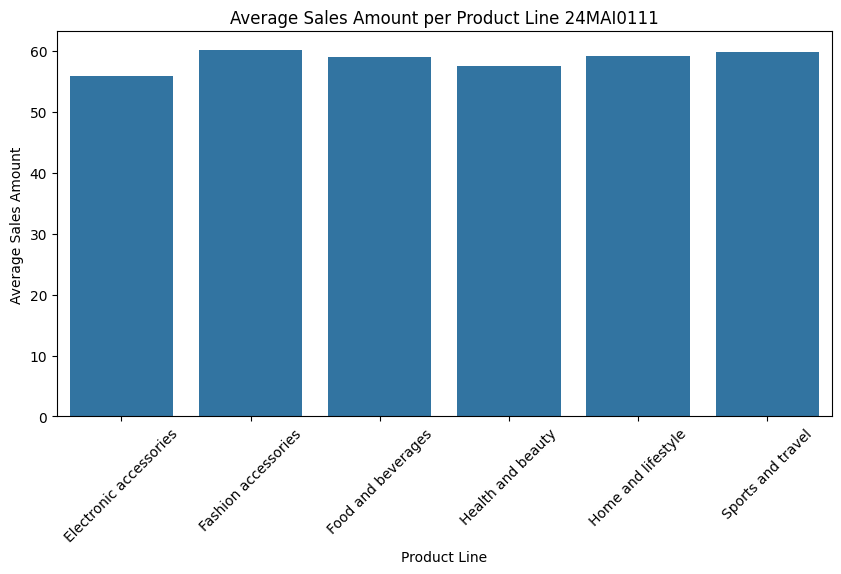

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales, x='Product line', y='Average Sales Amount')
plt.title("Average Sales Amount per Product Line 24MAI0111")
plt.xlabel("Product Line")
plt.ylabel("Average Sales Amount")
plt.xticks(rotation=45)
plt.show()